# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Import Modules------------------------------

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key-------------------------------

from secrets import weather_api_key
from citipy import citipy

# Output File (CSV)-----------------------------

output_data_file = "../output_data/cities.csv"

## Generate Cities List

In [2]:
# Make lists and get random cities--------------------------------

lat_range = (-90, 90)
lng_range = (-180, 180)
lat_lngs = []
cities = []

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)

len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# OPW Key setup---------------------
api_key = weather_api_key
units = "metric"

query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={units}&q="

count_one = 0
set_one = 1

In [12]:
#Set up lists----------------------------------

city_data = []
cloudiness = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

count_one = 0
set_one = 1

# Start loop for data----------------------------------

for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudiness.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("Done!")

City not found. Skipping...
City not found. Skipping...
Processing Record 1 of Set 1 | pevek
Processing Record 2 of Set 1 | grand bank
Processing Record 3 of Set 1 | padang
Processing Record 4 of Set 1 | moussoro
Processing Record 5 of Set 1 | vila franca do campo
Processing Record 6 of Set 1 | butaritari
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | viedma
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | longyearbyen
Processing Record 11 of Set 1 | tasiilaq
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | rudbar
Processing Record 14 of Set 1 | petropavlovsk-kamchatskiy
Processing Record 15 of Set 1 | sao lourenco do sul
City not found. Skipping...
Processing Record 16 of Set 1 | hobart
Processing Record 17 of Set 1 | port blair
Processing Record 18 of Set 1 | egvekinot
Processing Record 19 of Set 1 | praia
Processing Record 20 of Set 1 | mineros
Processing Record 21 of Set 1 | taltal
Processing Record 22 of Set 1 | hi

Processing Record 42 of Set 4 | vizinga
Processing Record 43 of Set 4 | fomboni
Processing Record 44 of Set 4 | aksu
Processing Record 45 of Set 4 | paita
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 46 of Set 4 | kisumu
Processing Record 47 of Set 4 | pochutla
Processing Record 48 of Set 4 | ribeira grande
Processing Record 49 of Set 4 | kloulklubed
Processing Record 1 of Set 5 | kirakira
Processing Record 2 of Set 5 | kochevo
Processing Record 3 of Set 5 | privas
Processing Record 4 of Set 5 | port-gentil
Processing Record 5 of Set 5 | upernavik
Processing Record 6 of Set 5 | jinja
Processing Record 7 of Set 5 | kodiak
Processing Record 8 of Set 5 | ulcinj
Processing Record 9 of Set 5 | esperance
Processing Record 10 of Set 5 | roebourne
Processing Record 11 of Set 5 | bambous virieux
Processing Record 12 of Set 5 | fuxin
City not found. Skipping...
Processing Record 13 of Set 5 | baikunthpur
Processing Record 14 of Set 5 | sal

Processing Record 33 of Set 8 | colon
City not found. Skipping...
Processing Record 34 of Set 8 | krasnoselkup
Processing Record 35 of Set 8 | seymchan
City not found. Skipping...
Processing Record 36 of Set 8 | gresham
Processing Record 37 of Set 8 | taitung
City not found. Skipping...
Processing Record 38 of Set 8 | sibolga
City not found. Skipping...
Processing Record 39 of Set 8 | college
Processing Record 40 of Set 8 | ileza
Processing Record 41 of Set 8 | severo-kurilsk
Processing Record 42 of Set 8 | manaure
Processing Record 43 of Set 8 | puerto del rosario
Processing Record 44 of Set 8 | araouane
Processing Record 45 of Set 8 | abu samrah
Processing Record 46 of Set 8 | grajau
Processing Record 47 of Set 8 | qui nhon
Processing Record 48 of Set 8 | pinsk
Processing Record 49 of Set 8 | isla mujeres
Processing Record 1 of Set 9 | panalingaan
Processing Record 2 of Set 9 | ramos arizpe
Processing Record 3 of Set 9 | negara
Processing Record 4 of Set 9 | qasigiannguit
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
#Create weather dictionary------

weather_dict = {
    "City": city_data,
    "Cloudiness": cloudiness,
    "Country": countries,
    "Date": dates,
    "Humidity": humidities,
    "Lat": lats,
    "Lng": lngs,
    "Max Temp": max_temps,
    "Wind Speed": wind_speeds
}

In [23]:
#Create dataframe from dictionary------

weather_df = pd.DataFrame(weather_dict)

weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,pevek,93,RU,1603319950,98,69.70,170.31,-1.22,0.13
1,grand bank,1,US,1603319950,10,38.88,-109.50,26.11,1.50
2,padang,100,ID,1603319950,86,-0.95,100.35,24.04,2.15
3,moussoro,4,TD,1603319951,13,13.64,16.49,30.92,6.09
4,vila franca do campo,9,PT,1603319951,90,42.03,-8.16,10.00,0.45


In [24]:
# Export to CSV---------------------

weather_df.to_csv("weather.csv")

In [25]:
# Clean new dataframe---------------

weather_data = pd.read_csv("weather.csv")
weather_clean = weather_data.drop(columns=["Unnamed: 0"])
weather_clean.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,pevek,93,RU,1603319950,98,69.70,170.31,-1.22,0.13
1,grand bank,1,US,1603319950,10,38.88,-109.50,26.11,1.50
2,padang,100,ID,1603319950,86,-0.95,100.35,24.04,2.15
3,moussoro,4,TD,1603319951,13,13.64,16.49,30.92,6.09
4,vila franca do campo,9,PT,1603319951,90,42.03,-8.16,10.00,0.45


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

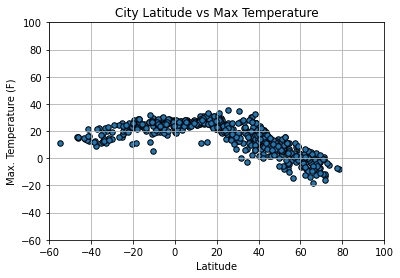

<Figure size 432x288 with 0 Axes>

In [32]:
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Max Temp"], marker='o',s=30, edgecolors= "black")
plt.title("City Latitude vs Max Temperature")
plt.ylim(-60,100)
plt.xlim(-60,100)
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid()
plt.show()
plt.savefig("lat_vs_tmp.png")

#### Latitude vs. Humidity Plot

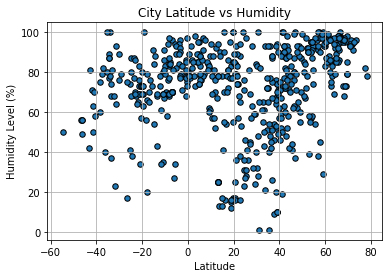

<Figure size 432x288 with 0 Axes>

In [34]:
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Humidity"], marker='o', s=30, edgecolors= "black")
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity Level (%)")
plt.xlabel("Latitude")
plt.grid()
plt.show()
plt.savefig('lat_vs_humid.png')

#### Latitude vs. Cloudiness Plot

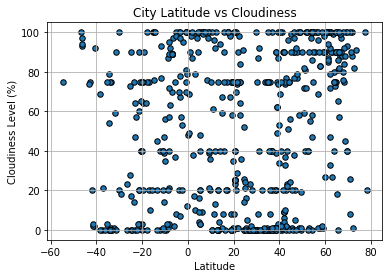

<Figure size 432x288 with 0 Axes>

In [35]:
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Cloudiness"], marker='o', s=30, edgecolors= "black")
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness Level (%)")
plt.xlabel("Latitude")
plt.grid()
plt.show()
plt.savefig('lat_vs_cloud.png')

#### Latitude vs. Wind Speed Plot

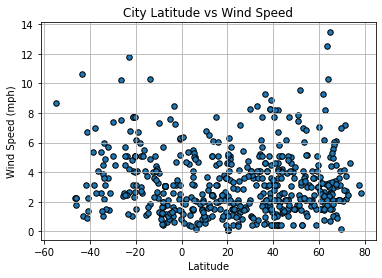

<Figure size 432x288 with 0 Axes>

In [36]:
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Wind Speed"], marker='o', s=30, edgecolors= "black")
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()
plt.show()
plt.savefig('lat_vs_wind.png')

## Linear Regression

In [37]:
# Create Northern and Southern Hemisphere---------------------

northern_hemisphere = weather_dataframe.loc[weather_dataframe["Lat"]>0.01]
southern_hemisphere = weather_dataframe.loc[weather_dataframe["Lat"]<-0.01]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

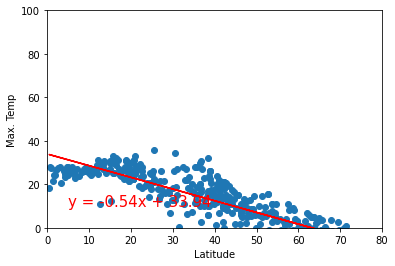

<Figure size 432x288 with 0 Axes>

In [38]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(5,10),fontsize=15,color="red")

plt.ylim(0,100)
plt.xlim(0, 80)

plt.ylabel("Max. Temp")
plt.xlabel("Latitude")
plt.show()

plt.savefig("north_vs_lat.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

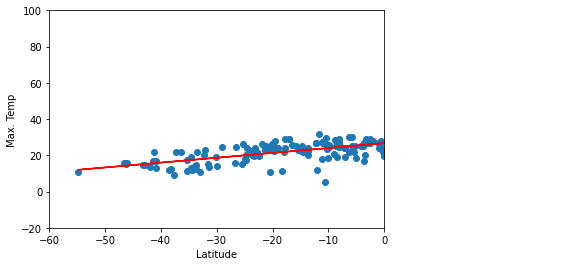

In [41]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.ylim(-20, 100)
plt.xlim(-60, 0, 10)

plt.ylabel("Max. Temp")
plt.xlabel("Latitude")
plt.show()

plt.savefig("south_vs_lat.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

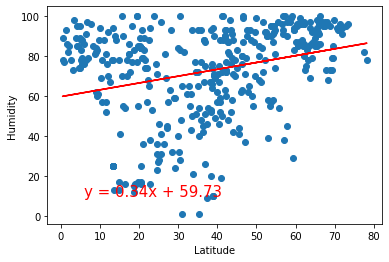

In [42]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.show()

plt.savefig("north_humid_vs_lat.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

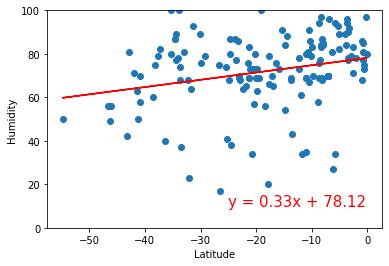

<Figure size 432x288 with 0 Axes>

In [43]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")

plt.ylim(0, 100)

plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.show()

plt.savefig("south_hum_vs_lat.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

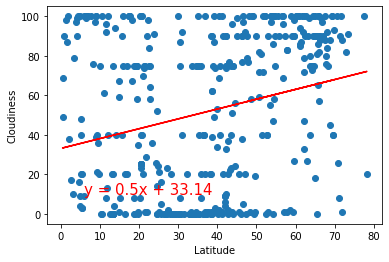

In [44]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.show()

plt.savefig("north_cloud_vs_lat.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

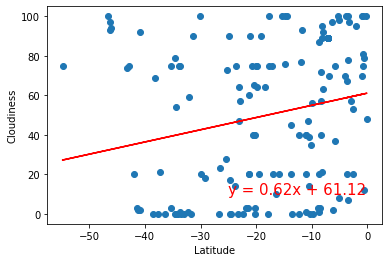

<Figure size 432x288 with 0 Axes>

In [45]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.show()

plt.savefig("south_cloud_vs_lat.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

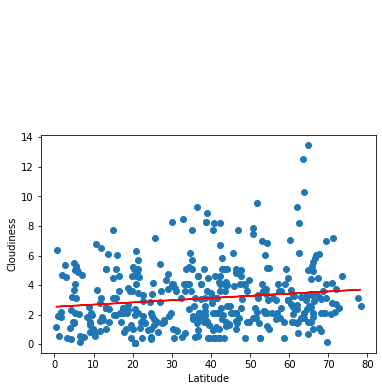

<Figure size 432x288 with 0 Axes>

In [46]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,22),fontsize=15,color="red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.show()

plt.savefig("north_wind_vs_lat.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

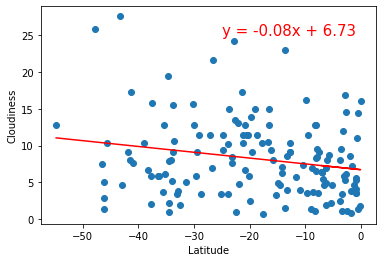

In [23]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,25),fontsize=15,color="red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.show()

plt.savefig("south_wind_vs_lat.png")